# Welcome to the Lending Club Case Study by Sailesh and Ashwini

#### Importing all Python libraries needed

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# To display all the columns
pd.options.display.max_columns = None
# To display all the rows
pd.options.display.max_rows = None


#### Reading Data from the loan.csv file

In [3]:
loans_dataset = pd.read_csv("loan.csv", encoding='utf-8')
#print the head of the dataset
print(loans_dataset.head())

        id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade                 emp_title emp_length  \
0   10.65%       162.87     B        B2                       NaN  10+ years   
1   15.27%        59.83     C        C4                     Ryder   < 1 year   
2   15.96%        84.33     C        C5                       NaN  10+ years   
3   13.49%       339.31     C        C1       AIR RESOURCES BOARD  10+ years   
4   12.69%        67.79     B        B5  University Medical Group     1 year   

  home_ownership  annual_inc verification_status i

#### Finding the shape of the dataset

In [4]:
loans_dataset.shape

(39717, 111)

#### Dropping all columns with na values

In [5]:
loans_dataset.dropna(axis = 1, how = 'all', inplace = True)
loans_dataset.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0,Jan-96,0,38.0,NaN,15,0,27783,53.90%,38,f,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,Jun-16,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [6]:
loans_dataset.shape

(39717, 57)

#### Let us now drop the columns that have only a single data which does not really add value to analysis
1. pymnt_plan
2. initial_list_status
3. collections_12_mths_ex_med
4. policy_code
5. application_type
6. pub_rec_bankruptcies
7. tax_liens
8. delinq_amnt
9. acc_now_delinq

In [7]:
loans_dataset.drop(['pymnt_plan', "initial_list_status",'collections_12_mths_ex_med','policy_code','acc_now_delinq', 'application_type', 'pub_rec_bankruptcies', 'tax_liens', 'delinq_amnt'], axis = 1, inplace = True)
loans_dataset.head()


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,chargeoff_within_12_mths
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0,Jan-96,0,38.0,NaN,15,0,27783,53.90%,38,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,Jun-16,May-16,0.0


In [8]:
loans_dataset.shape

(39717, 48)

### Now we remove the data columns that hold no/minimal value in our analysis, 

##### - Certain columns contain data that is post approval of a loan, but as we are mainly focusing on the pre approval part, we remove those columns. 
1. delinq_2yrs 
2. revol_bal 
3. out_prncp 
4. total_pymnt 
5. total_rec_prncp
6. total_rec_int 
7. total_rec_late_fee
8. recoveries
9. collection_recovery_fee
10. last_pymnt_d
11. last_pymnt_amnt
12. next_pymnt_d 
14. chargeoff_within_12_mths
15. mths_since_last_delinq 
16. mths_since_last_record
17. out_prncp_inv
18. total_pymnt_inv
19. funded_amnt

Also, we have certain columns that are having general information, that does not contribute to our analysis
1. id
2. member_id
3. url
4. title
5. emp_title
6. zip_code
7. last_credit_pull_d
8. addr_state
9. desc

In [9]:
loans_dataset.drop(["id", "member_id", "url", "title", "emp_title", "zip_code", "last_credit_pull_d", "addr_state","desc","out_prncp_inv","total_pymnt_inv","funded_amnt", "delinq_2yrs", "revol_bal", "out_prncp", "total_pymnt", "total_rec_prncp", "total_rec_int", "total_rec_late_fee", "recoveries", "collection_recovery_fee", "last_pymnt_d", "last_pymnt_amnt", "next_pymnt_d" , "chargeoff_within_12_mths", "mths_since_last_delinq", "mths_since_last_record"], axis = 1, inplace = True)
loans_dataset.head()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc
0,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,27.65,Jan-85,1,3,0,83.70%,9
1,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,1.00,Apr-99,5,3,0,9.40%,4
2,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,8.72,Nov-01,2,2,0,98.50%,10
3,10000,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,20.00,Feb-96,1,10,0,21%,37
4,3000,3000.0,60 months,12.69%,67.79,B,B5,1 year,RENT,80000.0,Source Verified,Dec-11,Current,other,17.94,Jan-96,0,15,0,53.90%,38


In [10]:
loans_dataset.shape

(39717, 21)

### Data cleaning
#### removal of % symbol from int_rate & revol_util column so as to support calculations


In [11]:
loans_dataset['int_rate'] = loans_dataset['int_rate'].str.rstrip('%')
loans_dataset['revol_util'] = loans_dataset['revol_util'].str.rstrip('%')

In [12]:
loans_dataset.head()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc
0,5000,4975.0,36 months,10.65,162.87,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,27.65,Jan-85,1,3,0,83.70,9
1,2500,2500.0,60 months,15.27,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,1.00,Apr-99,5,3,0,9.40,4
2,2400,2400.0,36 months,15.96,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,8.72,Nov-01,2,2,0,98.50,10
3,10000,10000.0,36 months,13.49,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,20.00,Feb-96,1,10,0,21,37
4,3000,3000.0,60 months,12.69,67.79,B,B5,1 year,RENT,80000.0,Source Verified,Dec-11,Current,other,17.94,Jan-96,0,15,0,53.90,38


In [13]:
loans_dataset.shape

(39717, 21)

#### As we are dealing with loan approval process, we can clearly remove the ones with loan_staus as 'Current' as we are analysing who are likely to default

In [14]:
loans_dataset = loans_dataset[loans_dataset.loan_status != 'Current']

In [15]:
loans_dataset.head()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc
0,5000,4975.0,36 months,10.65,162.87,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,27.65,Jan-85,1,3,0,83.70,9
1,2500,2500.0,60 months,15.27,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,1.00,Apr-99,5,3,0,9.40,4
2,2400,2400.0,36 months,15.96,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,8.72,Nov-01,2,2,0,98.50,10
3,10000,10000.0,36 months,13.49,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,20.00,Feb-96,1,10,0,21,37
5,5000,5000.0,36 months,7.90,156.46,A,A4,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,11.20,Nov-04,3,9,0,28.30,12


In [16]:
loans_dataset.shape

(38577, 21)

#### Now we should be left with only Fully paid and charged off as the unique values in loan_status. 
Let us see the unique values of loan_status

In [17]:
loans_dataset.loan_status.unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

#### Let us now see what kind of data we are left with

In [18]:
loans_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            38577 non-null  int64  
 1   funded_amnt_inv      38577 non-null  float64
 2   term                 38577 non-null  object 
 3   int_rate             38577 non-null  object 
 4   installment          38577 non-null  float64
 5   grade                38577 non-null  object 
 6   sub_grade            38577 non-null  object 
 7   emp_length           37544 non-null  object 
 8   home_ownership       38577 non-null  object 
 9   annual_inc           38577 non-null  float64
 10  verification_status  38577 non-null  object 
 11  issue_d              38577 non-null  object 
 12  loan_status          38577 non-null  object 
 13  purpose              38577 non-null  object 
 14  dti                  38577 non-null  float64
 15  earliest_cr_line     38577 non-null 

#### We see that 38577 is the total number of data entries we have, but emp_length and revol_util have some missing values 37544 and 38527 respectively
So let us now check the mode and value_counts of these two columns to see how we can impute the empty missing values

In [19]:
loans_dataset.emp_length.mode()

0    10+ years
dtype: object

In [20]:
loans_dataset.emp_length.value_counts()

10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: emp_length, dtype: int64

From the above, we can see that the 10+ years has the highest occourance in the dataset, and as the missing values are less, we can impute the missing values as the mode of the column

In [21]:
loans_dataset.emp_length.fillna(loans_dataset.emp_length.mode()[0], inplace = True)

Now lets cross check if the values are imputed or not and verify if there are still any missing values present

In [22]:
loans_dataset.emp_length.isna().sum()

0

We see that the missing values have been taken care of for now and have been imputed.
Next we do the similar thing with revol_util. But in this case, we will drop these missing values

In [23]:
loans_dataset.dropna(axis = 0, subset = ['revol_util'] , inplace = True)

Now lets confirm if the missing values have been dropped

In [24]:
loans_dataset.revol_util.isna().sum()

0

This 0 gives us an indication that the missing values have been dropped. Now lets see the shape of the dataset at its current juncture

In [25]:
loans_dataset.shape

(38527, 21)

Let us see the distribution of data in the emp_length column

In [26]:
loans_dataset.emp_length.value_counts()

10+ years    9517
< 1 year     4496
2 years      4286
3 years      4008
4 years      3335
5 years      3190
1 year       3163
6 years      2165
7 years      1708
8 years      1433
9 years      1226
Name: emp_length, dtype: int64

We see that the data is continuous, so lets assume that values < 1 year to be 1 year and values 10+ years to be 10 years and also remove these years from the dataset to use it for further calculations. Also lets convert these values to numeric

In [27]:
loans_dataset.emp_length = pd.to_numeric(loans_dataset.emp_length.apply(lambda x: 1 if "<" in x else (x.split('+')[0] if "+" in x else x.split()[0])))

Now lets see the dataset and observe our changes

In [28]:
loans_dataset.head()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc
0,5000,4975.0,36 months,10.65,162.87,B,B2,10,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,27.65,Jan-85,1,3,0,83.70,9
1,2500,2500.0,60 months,15.27,59.83,C,C4,1,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,1.00,Apr-99,5,3,0,9.40,4
2,2400,2400.0,36 months,15.96,84.33,C,C5,10,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,8.72,Nov-01,2,2,0,98.50,10
3,10000,10000.0,36 months,13.49,339.31,C,C1,10,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,20.00,Feb-96,1,10,0,21,37
5,5000,5000.0,36 months,7.90,156.46,A,A4,3,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,11.20,Nov-04,3,9,0,28.30,12


We see that the values < 1 year now have been updated to 1 year and 10+ years is now 10 years. Also the string years has been removed

Text(0.5, 0, 'Annual Income')

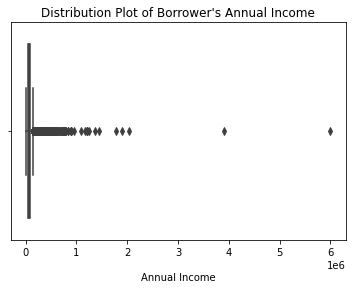

In [29]:
plt.title("Distribution Plot of Borrower's Annual Income")
sns.boxplot(loans_dataset.annual_inc)
plt.xlabel('Annual Income', labelpad = 15)

This plot gives us a clear picture of outliers. By observation, we see that after 2million, there is a huge discontinuity in the distribution. We can approximately consider 98% as the threshold. Let us get the quantile info to give us an idea of why 98% is chosen as the threshold.

In [30]:
threshold_info = loans_dataset.annual_inc.quantile([0.5, 0.75,0.90, 0.95, 0.97,0.98, 0.99])
threshold_info

0.50     59000.0
0.75     82000.0
0.90    115000.0
0.95    140004.0
0.97    165000.0
0.98    187000.0
0.99    234000.0
Name: annual_inc, dtype: float64

Now it is safe to say that after the 98th percentile, data seems to go off from the distribution, so let us now remove the threshold values.

Text(0.5, 0, 'Annual Income')

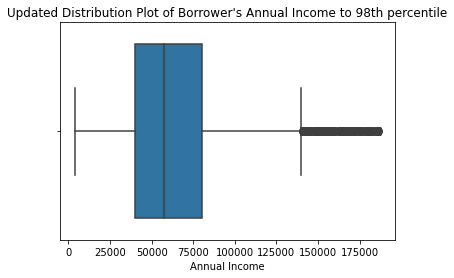

In [31]:
loans_dataset = loans_dataset[loans_dataset.annual_inc <= loans_dataset.annual_inc.quantile(0.98)]
plt.title("Updated Distribution Plot of Borrower's Annual Income to 98th percentile")
sns.boxplot(loans_dataset.annual_inc)
plt.xlabel('Annual Income')

Let us now correct the data types of certain columns
lets check the information from the dataset

In [32]:
loans_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37758 entries, 0 to 39716
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            37758 non-null  int64  
 1   funded_amnt_inv      37758 non-null  float64
 2   term                 37758 non-null  object 
 3   int_rate             37758 non-null  object 
 4   installment          37758 non-null  float64
 5   grade                37758 non-null  object 
 6   sub_grade            37758 non-null  object 
 7   emp_length           37758 non-null  int64  
 8   home_ownership       37758 non-null  object 
 9   annual_inc           37758 non-null  float64
 10  verification_status  37758 non-null  object 
 11  issue_d              37758 non-null  object 
 12  loan_status          37758 non-null  object 
 13  purpose              37758 non-null  object 
 14  dti                  37758 non-null  float64
 15  earliest_cr_line     37758 non-null 

As you can see, int_rate is in object data type which is incorrect for calculation purpose. We will be changing it to float64

In [33]:
loans_dataset.int_rate = pd.to_numeric(loans_dataset.int_rate)
#to_numeric by default converts to float64
loans_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37758 entries, 0 to 39716
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            37758 non-null  int64  
 1   funded_amnt_inv      37758 non-null  float64
 2   term                 37758 non-null  object 
 3   int_rate             37758 non-null  float64
 4   installment          37758 non-null  float64
 5   grade                37758 non-null  object 
 6   sub_grade            37758 non-null  object 
 7   emp_length           37758 non-null  int64  
 8   home_ownership       37758 non-null  object 
 9   annual_inc           37758 non-null  float64
 10  verification_status  37758 non-null  object 
 11  issue_d              37758 non-null  object 
 12  loan_status          37758 non-null  object 
 13  purpose              37758 non-null  object 
 14  dti                  37758 non-null  float64
 15  earliest_cr_line     37758 non-null 

### Lets now move to Derived Matrices
We can pick the issue_d column for this

In [34]:
loans_dataset.head()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc
0,5000,4975.0,36 months,10.65,162.87,B,B2,10,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,27.65,Jan-85,1,3,0,83.70,9
1,2500,2500.0,60 months,15.27,59.83,C,C4,1,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,1.00,Apr-99,5,3,0,9.40,4
2,2400,2400.0,36 months,15.96,84.33,C,C5,10,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,8.72,Nov-01,2,2,0,98.50,10
3,10000,10000.0,36 months,13.49,339.31,C,C1,10,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,20.00,Feb-96,1,10,0,21,37
5,5000,5000.0,36 months,7.90,156.46,A,A4,3,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,11.20,Nov-04,3,9,0,28.30,12


In [35]:
loans_dataset['issue_yr'] = pd.to_datetime(loans_dataset.issue_d, format = '%b-%y').dt.year

In [36]:
loans_dataset.head()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,issue_yr
0,5000,4975.0,36 months,10.65,162.87,B,B2,10,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,27.65,Jan-85,1,3,0,83.70,9,2011
1,2500,2500.0,60 months,15.27,59.83,C,C4,1,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,1.00,Apr-99,5,3,0,9.40,4,2011
2,2400,2400.0,36 months,15.96,84.33,C,C5,10,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,8.72,Nov-01,2,2,0,98.50,10,2011
3,10000,10000.0,36 months,13.49,339.31,C,C1,10,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,20.00,Feb-96,1,10,0,21,37,2011
5,5000,5000.0,36 months,7.90,156.46,A,A4,3,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,11.20,Nov-04,3,9,0,28.30,12,2011


## Univariate Analysis

Let us perform univariate analysis on the following columns:
### 1. Loan Status

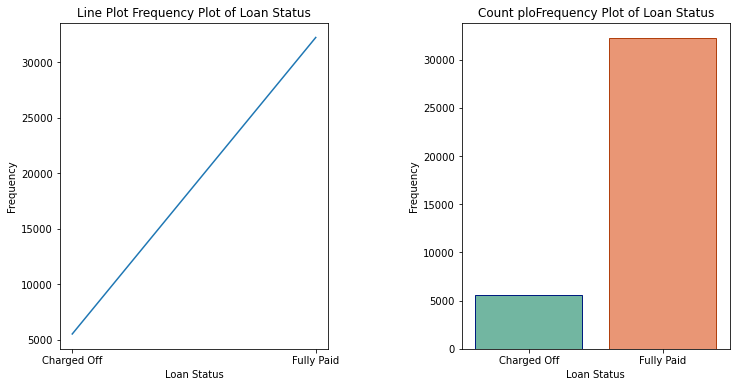

Fully Paid     32225
Charged Off     5533
Name: loan_status, dtype: int64


37758

In [37]:
plt.figure(figsize = (12, 6))

plt.subplot(1, 2, 1)
plt.title('Line Plot Frequency Plot of Loan Status')
sns.lineplot(data = loans_dataset.loan_status.value_counts(dropna = False).sort_index(), palette="Set2")
plt.xlabel('Loan Status')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.title('Count ploFrequency Plot of Loan Status')
sns.countplot(x = 'loan_status',  
              order = loans_dataset.loan_status.value_counts(dropna = False).sort_index().index, 
              data = loans_dataset, palette="Set2", edgecolor=sns.color_palette("dark", 3))
plt.xlabel('Loan Status')
plt.ylabel('Frequency')

plt.subplots_adjust(wspace = 0.5)
plt.show()


print(loans_dataset.loan_status.value_counts(dropna = False))
loans_dataset.loan_status.value_counts(dropna = False).sum()

#### Out of 37042 values, 5448 are charged off and that is our main area of analysis

### 2. Term

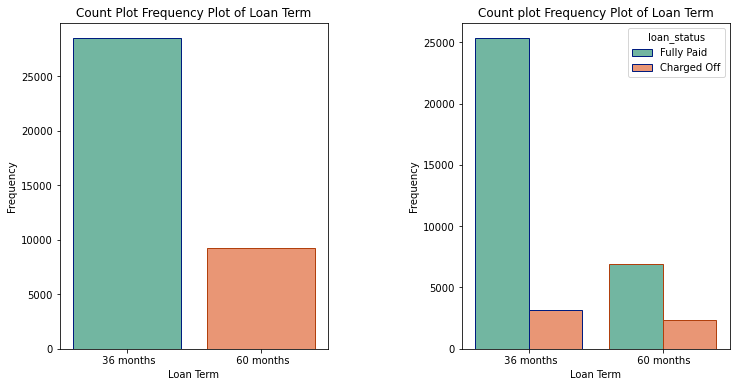

 36 months    3171
 60 months    2362
Name: term, dtype: int64


5533

In [38]:


plt.figure(figsize = (12, 6))

plt.subplot(1, 2, 1)
plt.title('Count Plot Frequency Plot of Loan Term')
sns.countplot(x = 'term',  
              order = loans_dataset.term.value_counts(dropna = False).sort_index().index, 
              data = loans_dataset, palette="Set2", edgecolor=sns.color_palette("dark", 3))
plt.xlabel('Loan Term')
plt.ylabel('Frequency')


plt.subplot(1, 2, 2)
plt.title('Count plot Frequency Plot of Loan Term')
sns.countplot(x='term',  hue = 'loan_status',
              order= loans_dataset.term.value_counts(dropna = False).sort_index().index,
              data = loans_dataset, palette="Set2", edgecolor=sns.color_palette("dark", 3))
plt.xlabel('Loan Term')
plt.ylabel('Frequency')

plt.subplots_adjust(wspace = 0.5)
plt.show()


print(loans_dataset.term[loans_dataset['loan_status']=='Charged Off'].value_counts(dropna = False))
loans_dataset.term[loans_dataset['loan_status']=='Charged Off'].value_counts(dropna = False).sum()

#### Most of the people who apply for the loan term of 36 months tend to be charged off or get defaulted. 3171 people who opted for 36 months got defaulted/charged off against 2362 people who opted for 60months.

### 3. Employment Length

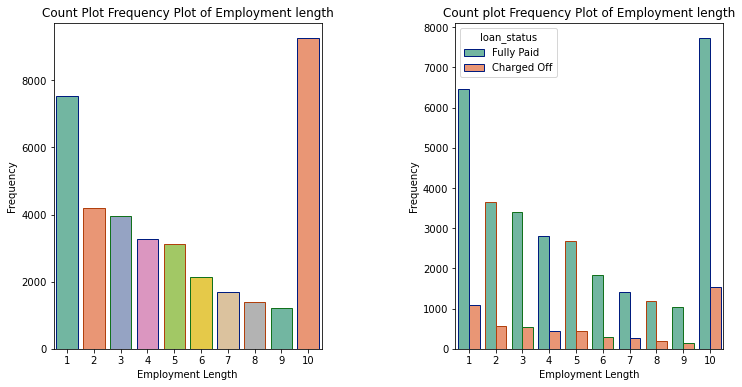

10    1528
1     1078
2      559
3      549
4      452
5      450
6      301
7      261
8      199
9      156
Name: emp_length, dtype: int64


5533

In [39]:


plt.figure(figsize = (12, 6))

plt.subplot(1, 2, 1)
plt.title('Count Plot Frequency Plot of Employment length')
sns.countplot(x = 'emp_length',  
              order = loans_dataset.emp_length.value_counts(dropna = False).sort_index().index, 
              data = loans_dataset, palette="Set2", edgecolor=sns.color_palette("dark", 3))
plt.xlabel('Employment Length')
plt.ylabel('Frequency')


plt.subplot(1, 2, 2)
plt.title('Count plot Frequency Plot of Employment length')
sns.countplot(x='emp_length',  hue = 'loan_status',
              order= loans_dataset.emp_length.value_counts(dropna = False).sort_index().index,
              data = loans_dataset, palette="Set2", edgecolor=sns.color_palette("dark", 3))
plt.xlabel('Employment Length')
plt.ylabel('Frequency')

plt.subplots_adjust(wspace = 0.5)
plt.show()


print(loans_dataset.emp_length[loans_dataset['loan_status']=='Charged Off'].value_counts(dropna = False))
loans_dataset.emp_length[loans_dataset['loan_status']=='Charged Off'].value_counts(dropna = False).sum()

#### From the above plots we can say that people who have the employment term as 10+ years and 1 year tend to be  defaulted/charged off more than other employment terms

### 4. Grades

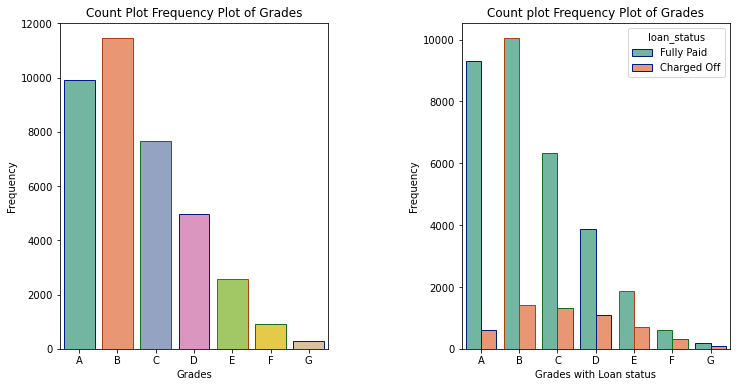

A     9905
B    11451
C     7662
D     4961
E     2568
F      929
G      282
Name: grade, dtype: int64


loan_status  grade
Charged Off  A          600
             B         1404
             C         1334
             D         1102
             E          693
             F          305
             G           95
Fully Paid   A         9305
             B        10047
             C         6328
             D         3859
             E         1875
             F          624
             G          187
Name: grade, dtype: int64

In [40]:
plt.figure(figsize = (12, 6))

plt.subplot(1, 2, 1)
plt.title('Count Plot Frequency Plot of Grades')
sns.countplot(x = 'grade',  
              order = loans_dataset.grade.value_counts(dropna = False).sort_index().index, 
              data = loans_dataset, palette="Set2", edgecolor=sns.color_palette("dark", 3))
plt.xlabel('Grades')
plt.ylabel('Frequency')


plt.subplot(1, 2, 2)
plt.title('Count plot Frequency Plot of Grades')
sns.countplot(x='grade',  hue = 'loan_status',
              order= loans_dataset.grade.value_counts(dropna = False).sort_index().index,
              data = loans_dataset, palette="Set2", edgecolor=sns.color_palette("dark", 3))
plt.xlabel('Grades with Loan status')
plt.ylabel('Frequency')

plt.subplots_adjust(wspace = 0.5)
plt.show()


print(loans_dataset.grade.value_counts(dropna = False).sort_index())
loans_dataset.groupby(by = 'loan_status').grade.value_counts(dropna = False).sort_index()
#loans_dataset.grade[loans_dataset['grade']=='Charged Off'].value_counts(dropna = False).sum()

#### We can infer from the above plots that, grades B, C & D tend to be defaulted/charged off more than the other grades.

### 5. Issue Year

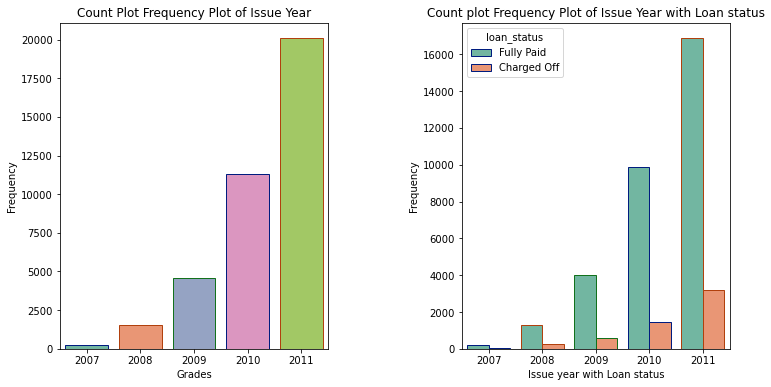

2007      240
2008     1530
2009     4598
2010    11298
2011    20092
Name: issue_yr, dtype: int64


loan_status  issue_yr
Charged Off  2007           42
             2008          240
             2009          581
             2010         1450
             2011         3220
Fully Paid   2007          198
             2008         1290
             2009         4017
             2010         9848
             2011        16872
Name: issue_yr, dtype: int64

In [41]:
plt.figure(figsize = (12, 6))

plt.subplot(1, 2, 1)
plt.title('Count Plot Frequency Plot of Issue Year')
sns.countplot(x = 'issue_yr',  
              order = loans_dataset.issue_yr.value_counts(dropna = False).sort_index().index, 
              data = loans_dataset, palette="Set2", edgecolor=sns.color_palette("dark", 3))
plt.xlabel('Grades')
plt.ylabel('Frequency')


plt.subplot(1, 2, 2)
plt.title('Count plot Frequency Plot of Issue Year with Loan status')
sns.countplot(x='issue_yr',  hue = 'loan_status',
              order= loans_dataset.issue_yr.value_counts(dropna = False).sort_index().index,
              data = loans_dataset, palette="Set2", edgecolor=sns.color_palette("dark", 3))
plt.xlabel('Issue year with Loan status')
plt.ylabel('Frequency')

plt.subplots_adjust(wspace = 0.5)
plt.show()


print(loans_dataset.issue_yr.value_counts(dropna = False).sort_index())
loans_dataset.groupby(by = 'loan_status').issue_yr.value_counts(dropna = False).sort_index()
#loans_dataset.grade[loans_dataset['grade']=='Charged Off'].value_counts(dropna = False).sum()

#### We can see that in the year 2011, the loans issued are tend to get more defaulted than in the previous years, followed by the year 2010

### 6. Home Ownership

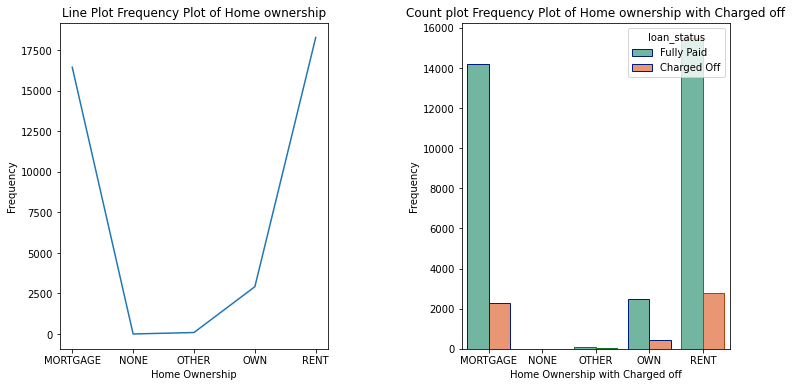

RENT        18290
MORTGAGE    16453
OWN          2919
OTHER          93
NONE            3
Name: home_ownership, dtype: int64


loan_status  home_ownership
Charged Off  MORTGAGE           2276
             OTHER                17
             OWN                 437
             RENT               2803
Fully Paid   MORTGAGE          14177
             NONE                  3
             OTHER                76
             OWN                2482
             RENT              15487
Name: home_ownership, dtype: int64

In [42]:
plt.figure(figsize = (12, 6))

plt.subplot(1, 2, 1)
plt.title('Line Plot Frequency Plot of Home ownership')
sns.lineplot(data = loans_dataset.home_ownership.value_counts(dropna = False).sort_index(), palette="Set2")
plt.xlabel('Home Ownership')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.title('Count plot Frequency Plot of Home ownership with Charged off')
sns.countplot(x = 'home_ownership', hue = 'loan_status', 
              order = loans_dataset.home_ownership.value_counts(dropna = False).sort_index().index, 
              data = loans_dataset, palette="Set2", edgecolor=sns.color_palette("dark", 3))
plt.xlabel('Home Ownership with Charged off')
plt.ylabel('Frequency')

plt.subplots_adjust(wspace = 0.5)
plt.show()


print(loans_dataset.home_ownership.value_counts(dropna = False))
loans_dataset.groupby(by = 'loan_status').home_ownership.value_counts(dropna = False).sort_index()

#### We can observe from the plots that there is a high occourance of Defaulted/Charged off loan takers amongst Mortgage and Rented home ownership

### 7. Purpose

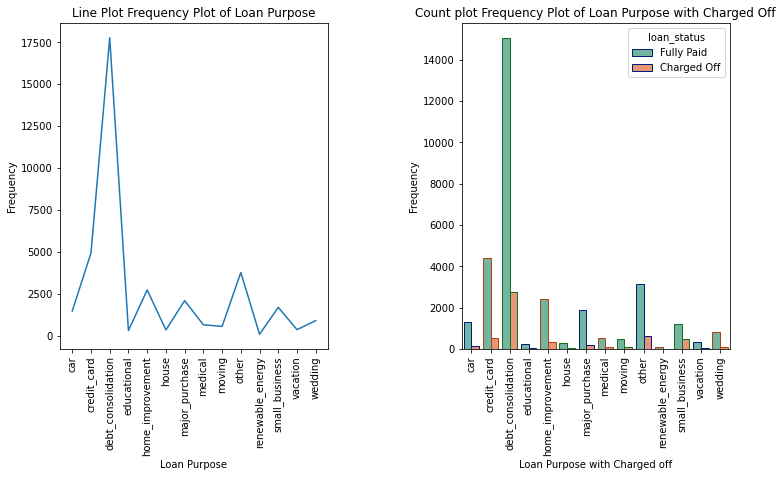

debt_consolidation    17767
credit_card            4937
other                  3776
home_improvement       2735
major_purchase         2101
small_business         1697
car                    1477
wedding                 908
medical                 659
moving                  564
vacation                371
house                   353
educational             316
renewable_energy         97
Name: purpose, dtype: int64


loan_status  purpose           
Charged Off  car                     159
             credit_card             533
             debt_consolidation     2738
             educational              54
             home_improvement        332
             house                    57
             major_purchase          218
             medical                 105
             moving                   90
             other                   613
             renewable_energy         18
             small_business          469
             vacation                 53
             wedding                  94
Fully Paid   car                    1318
             credit_card            4404
             debt_consolidation    15029
             educational             262
             home_improvement       2403
             house                   296
             major_purchase         1883
             medical                 554
             moving                  474
             other       

In [43]:
plt.figure(figsize = (12, 6))

plt.subplot(1, 2, 1)
plt.title('Line Plot Frequency Plot of Loan Purpose')
sns.lineplot(data = loans_dataset.purpose.value_counts(dropna = False).sort_index(), palette="Set2")
plt.xlabel('Loan Purpose')
plt.ylabel('Frequency')
plt.xticks(rotation = 90)

plt.subplot(1, 2, 2)
plt.title('Count plot Frequency Plot of Loan Purpose with Charged Off')
sns.countplot(x = 'purpose', hue = 'loan_status', 
              order = loans_dataset.purpose.value_counts(dropna = False).sort_index().index, 
              data = loans_dataset, palette="Set2", edgecolor=sns.color_palette("dark", 3))
plt.xlabel('Loan Purpose with Charged off')
plt.ylabel('Frequency')
plt.xticks(rotation = 90)

plt.subplots_adjust(wspace = 0.5)
plt.show()


print(loans_dataset.purpose.value_counts(dropna = False))
loans_dataset.groupby(by = 'loan_status').purpose.value_counts(dropna = False).sort_index()

#### From the above plots we can conclude that, the main loan purposes that have been charged off are 
1. debt_consolidation
2. credit_card
3. other
 
##### But in terms of higher percentage, the loan purpose that has higher charged off rate is small_business

In [44]:
loans_dataset.head()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,issue_yr
0,5000,4975.0,36 months,10.65,162.87,B,B2,10,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,27.65,Jan-85,1,3,0,83.70,9,2011
1,2500,2500.0,60 months,15.27,59.83,C,C4,1,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,1.00,Apr-99,5,3,0,9.40,4,2011
2,2400,2400.0,36 months,15.96,84.33,C,C5,10,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,8.72,Nov-01,2,2,0,98.50,10,2011
3,10000,10000.0,36 months,13.49,339.31,C,C1,10,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,20.00,Feb-96,1,10,0,21,37,2011
5,5000,5000.0,36 months,7.90,156.46,A,A4,3,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,11.20,Nov-04,3,9,0,28.30,12,2011


### Bivariate Analysis

Before we do the bivariate analysis, let us do the binning of certain columns, as we have too much data to plot and observe in a graphical representation
### A. Annual Income Binning

In [56]:
loans_dataset['annual_inc_bin'] = pd.cut(loans_dataset['annual_inc'], bins=5,precision =0, labels =['3.8k-41k','41k-77k','77k-114k','114k-150k','150k-187k'])


In [57]:
print(loans_dataset['annual_inc_bin'].value_counts())
loans_dataset.head()

41k-77k      17639
3.8k-41k      9748
77k-114k      7082
114k-150k     2576
150k-187k      713
Name: annual_inc_bin, dtype: int64


,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,issue_yr,annual_inc_bin
0,5000,4975.0,36 months,10.65,162.87,B,B2,10,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,27.65,Jan-85,1,3,0,83.70,9,2011,3.8k-41k
1,2500,2500.0,60 months,15.27,59.83,C,C4,1,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,1.00,Apr-99,5,3,0,9.40,4,2011,3.8k-41k
2,2400,2400.0,36 months,15.96,84.33,C,C5,10,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,8.72,Nov-01,2,2,0,98.50,10,2011,3.8k-41k
3,10000,10000.0,36 months,13.49,339.31,C,C1,10,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,20.00,Feb-96,1,10,0,21,37,2011,41k-77k
5,5000,5000.0,36 months,7.90,156.46,A,A4,3,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,11.20,Nov-04,3,9,0,28.30,12,2011,3.8k-41k


Lets take Annual Salary as the basis for our further analysis
### 1.  Annual salary with home ownership

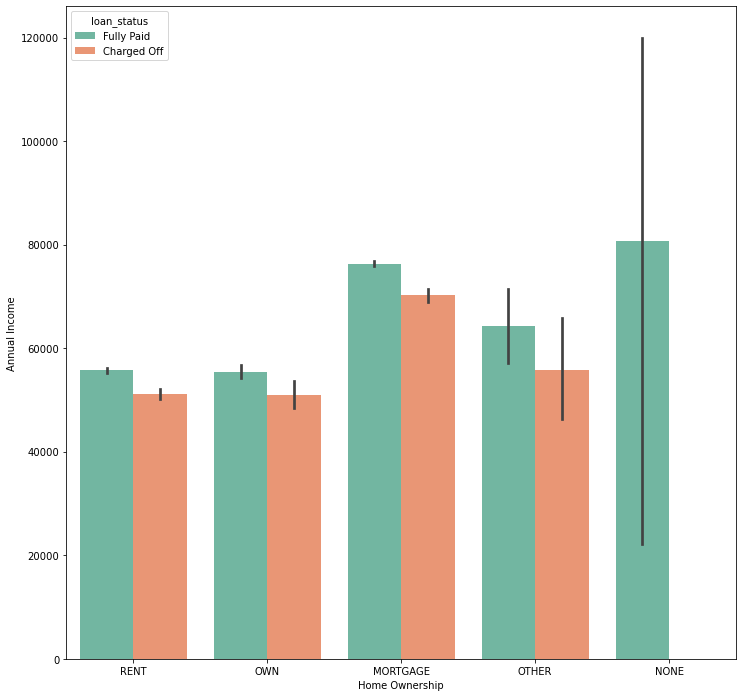

In [119]:
plt.figure(figsize=(12,12))
sns.barplot(data =loans_dataset,x='home_ownership', y='annual_inc', hue ='loan_status',palette="Set2")
plt.xlabel('Home Ownership')
plt.ylabel('Annual Income')
plt.show()

### 2. Annual Income with Loan amount

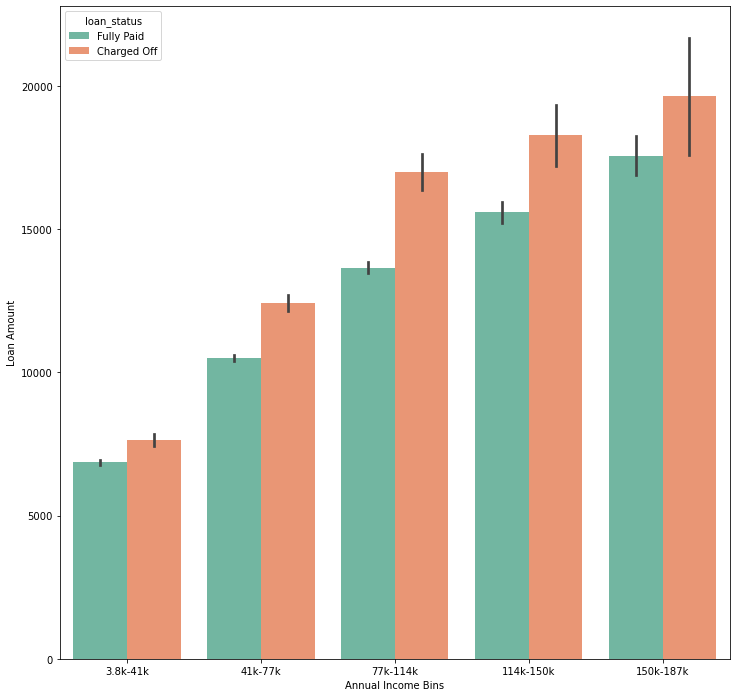

In [117]:
plt.figure(figsize=(12, 12))
sns.barplot( data = loans_dataset, x = "annual_inc_bin", y = "loan_amnt", hue = 'loan_status', palette="Set2")
plt.ylabel('Loan Amount')
plt.xlabel('Annual Income Bins')
plt.show()

### 3. Annual Income with Interest Rates

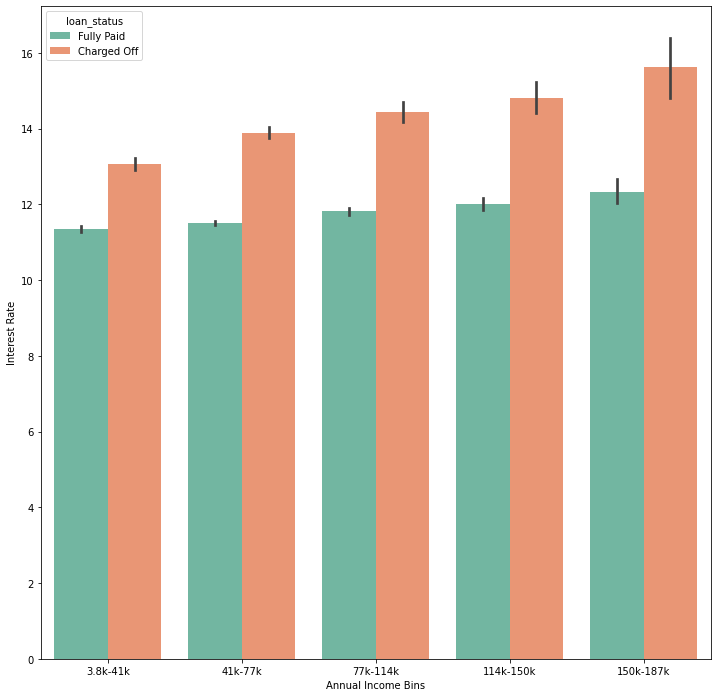

In [115]:
plt.figure(figsize=(12, 12))
sns.barplot(data =loans_dataset ,x='annual_inc_bin', y='int_rate', hue ='loan_status',palette="Set2")
plt.ylabel('Interest Rate')
plt.xlabel('Annual Income Bins')
plt.show()

### 4. Annual Income with Funded Amount Invested

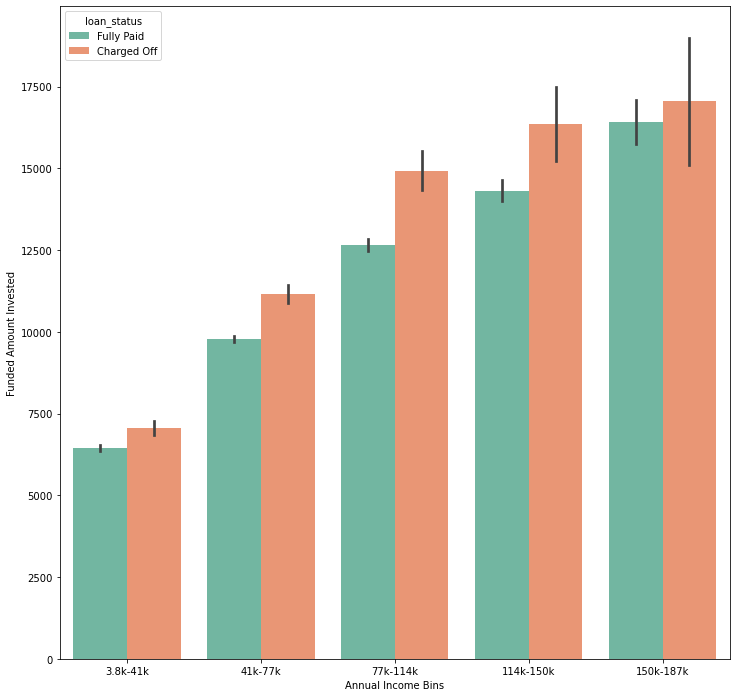

In [114]:
plt.figure(figsize=(12,12))
sns.barplot(data =loans_dataset ,x='annual_inc_bin', y='funded_amnt_inv', hue ='loan_status',palette="Set2")
plt.ylabel('Funded Amount Invested')
plt.xlabel('Annual Income Bins')
plt.show()

### 5. Annual Income with total_acc

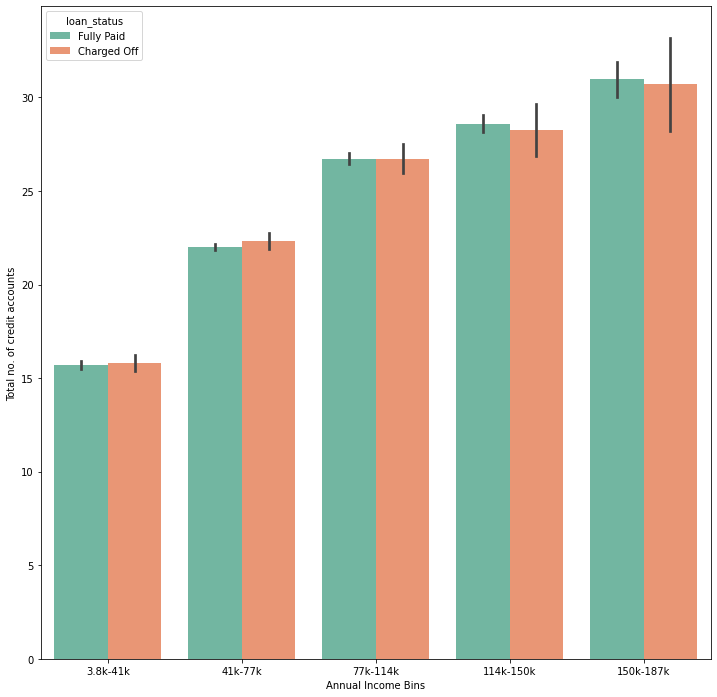

In [113]:
plt.figure(figsize=(12,12))
sns.barplot(data =loans_dataset ,x='annual_inc_bin', y='total_acc', hue ='loan_status',palette="Set2")
plt.ylabel('Total no. of credit accounts')
plt.xlabel('Annual Income Bins')
plt.show()

### 6. Annual Income with Purpose

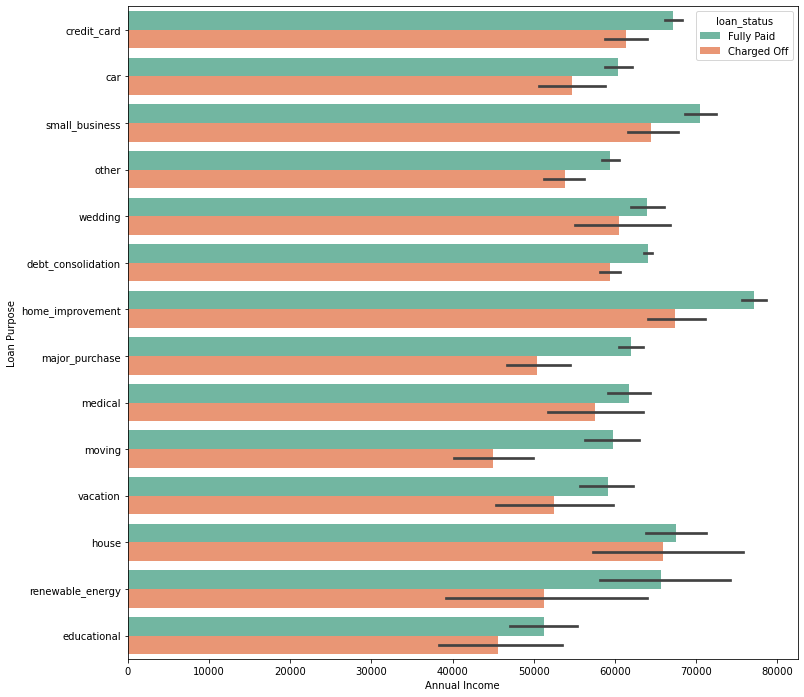

In [110]:
plt.figure(figsize=(12,12))
sns.barplot(data =loans_dataset, x='annual_inc', y='purpose', hue ='loan_status',palette="Set2")
plt.ylabel('Loan Purpose')
plt.xlabel('Annual Income')
plt.show()

### 7. Annual Income with Verification status

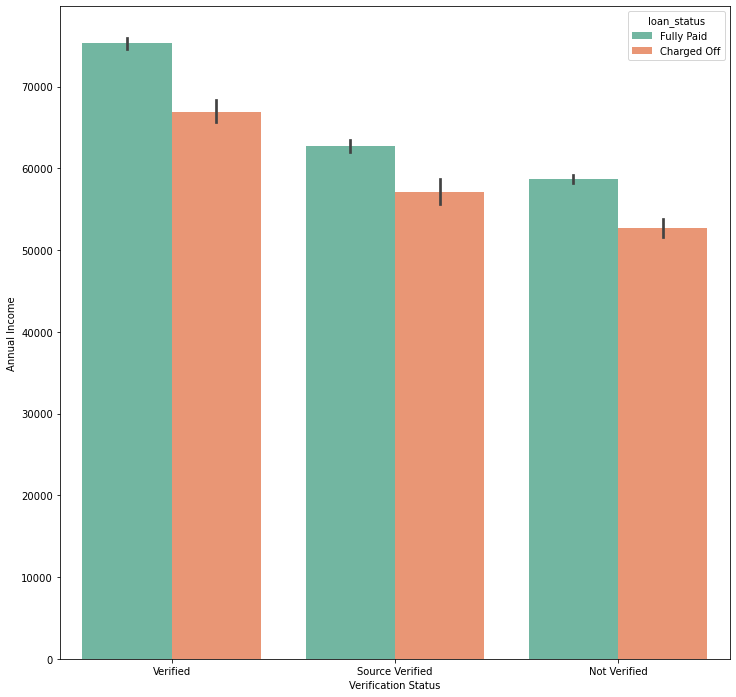

In [97]:
plt.figure(figsize=(12,12))
sns.barplot(data =loans_dataset, y='annual_inc', x='verification_status', hue ='loan_status',palette="Set2")
plt.xlabel('Verification Status')
plt.ylabel('Annual Income')
plt.show()

### B. Loan Amount Binning

In [73]:
loans_dataset['loan_amnt_bins'] = pd.cut(loans_dataset['loan_amnt'], bins=7,precision =0, labels=['0.5k-5.5k','5.5k-10.3k','10.3k-15.2k','15.2k-20.2k','20.2k-25.1k','25.1k-30k','30k-35k'])

In [74]:
loans_dataset['loan_amnt_bins'].value_counts()

5.5k-10.3k     12457
0.5k-5.5k       9675
10.3k-15.2k     7552
15.2k-20.2k     4146
20.2k-25.1k     2642
25.1k-30k        647
30k-35k          639
Name: loan_amnt_bins, dtype: int64

In [75]:
loans_dataset.head()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,issue_yr,annual_inc_bin,loan_amnt_bins
0,5000,4975.0,36 months,10.65,162.87,B,B2,10,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,27.65,Jan-85,1,3,0,83.70,9,2011,3.8k-41k,0.5k-5.5k
1,2500,2500.0,60 months,15.27,59.83,C,C4,1,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,1.00,Apr-99,5,3,0,9.40,4,2011,3.8k-41k,0.5k-5.5k
2,2400,2400.0,36 months,15.96,84.33,C,C5,10,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,8.72,Nov-01,2,2,0,98.50,10,2011,3.8k-41k,0.5k-5.5k
3,10000,10000.0,36 months,13.49,339.31,C,C1,10,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,20.00,Feb-96,1,10,0,21,37,2011,41k-77k,5.5k-10.3k
5,5000,5000.0,36 months,7.90,156.46,A,A4,3,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,11.20,Nov-04,3,9,0,28.30,12,2011,3.8k-41k,0.5k-5.5k


Lets take Loan Amount as the basis for our first few analysis
### 1.  Loan Amount with home ownership

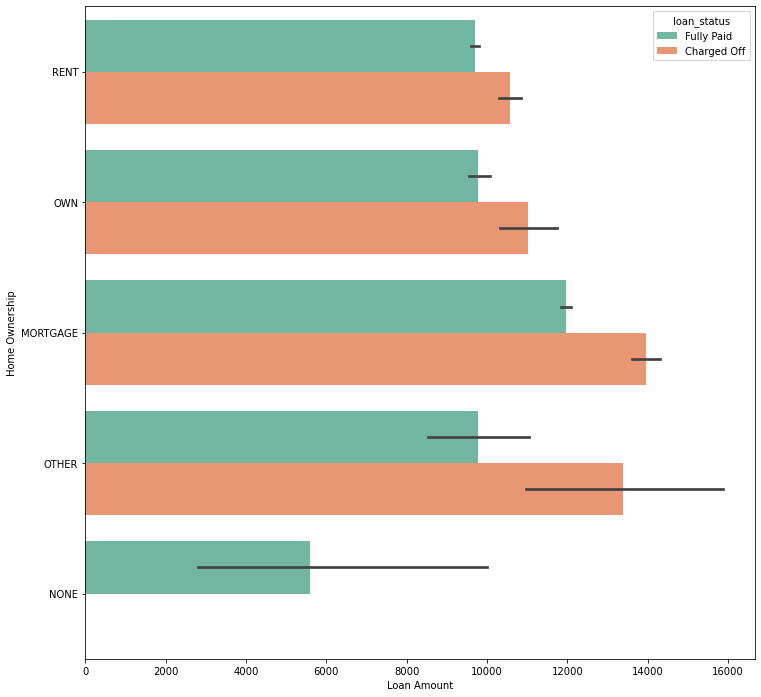

In [98]:
plt.figure(figsize=(12,12))
sns.barplot(data =loans_dataset, x='loan_amnt', y='home_ownership', hue ='loan_status',palette="Set2")
plt.xlabel('Loan Amount')
plt.ylabel('Home Ownership')
plt.show()

### 2.  Loan Amount with Loan purpose

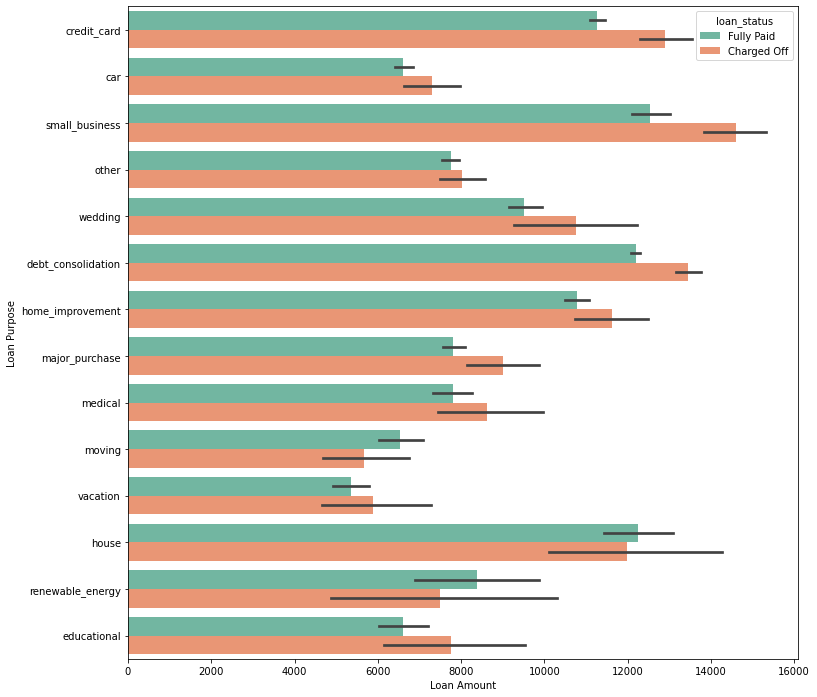

In [100]:
plt.figure(figsize=(12,12))
sns.barplot(data =loans_dataset, x='loan_amnt', y='purpose', hue ='loan_status',palette="Set2")
plt.xlabel('Loan Amount')
plt.ylabel('Loan Purpose')
plt.show()

#### 3. Loan amount with Interest rate

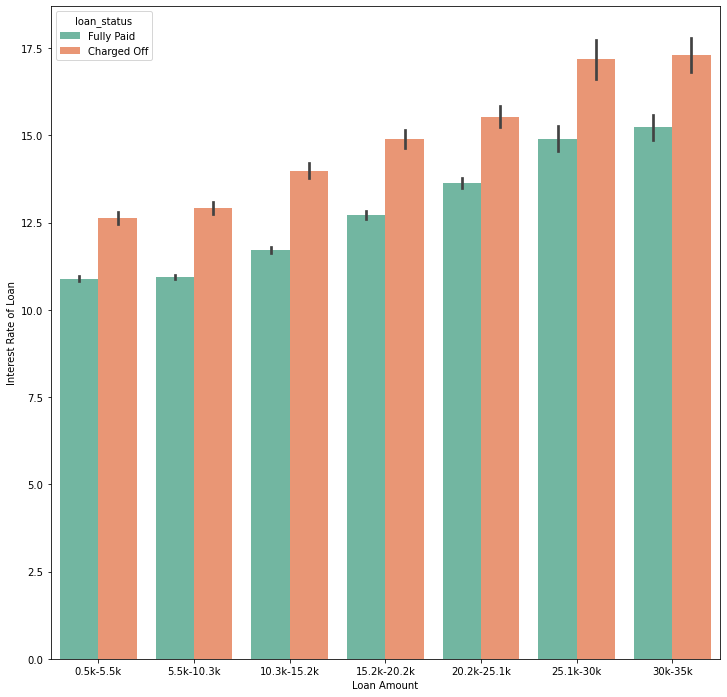

In [101]:
plt.figure(figsize=(12,12))
sns.barplot(data =loans_dataset, x='loan_amnt_bins', y='int_rate', hue ='loan_status',palette="Set2")
plt.xlabel('Loan Amount')
plt.ylabel('Interest Rate of Loan')
plt.show()

#### 4. Loan amount with Issue Year

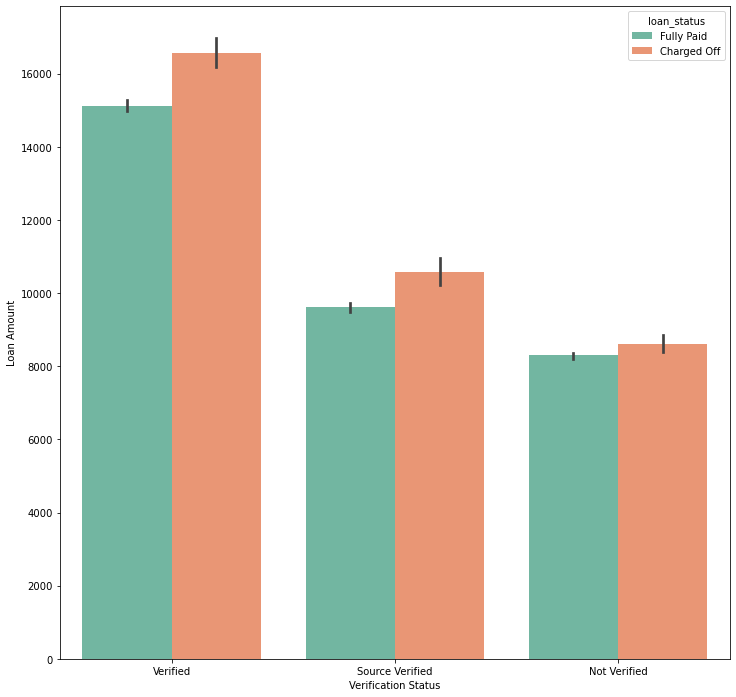

In [105]:
plt.figure(figsize=(12,12))
sns.barplot(data =loans_dataset, y='loan_amnt', x='verification_status', hue ='loan_status',palette="Set2")
plt.ylabel('Loan Amount')
plt.xlabel('Verification Status')
plt.show()

#### 5. Loan Amount with Employment Length

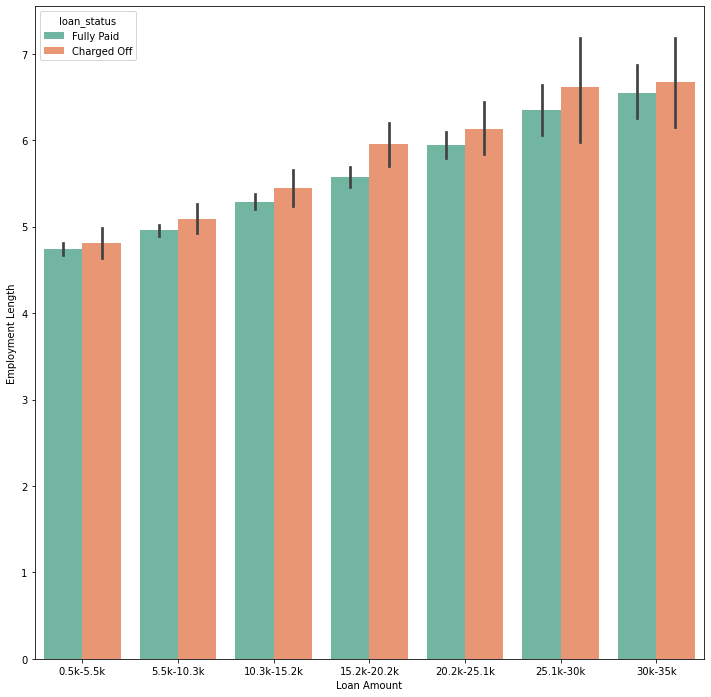

In [107]:
plt.figure(figsize=(12,12))
sns.barplot(data =loans_dataset, x='loan_amnt_bins', y='emp_length', hue ='loan_status',palette="Set2")
plt.xlabel('Loan Amount')
plt.ylabel('Employment Length')
plt.show()

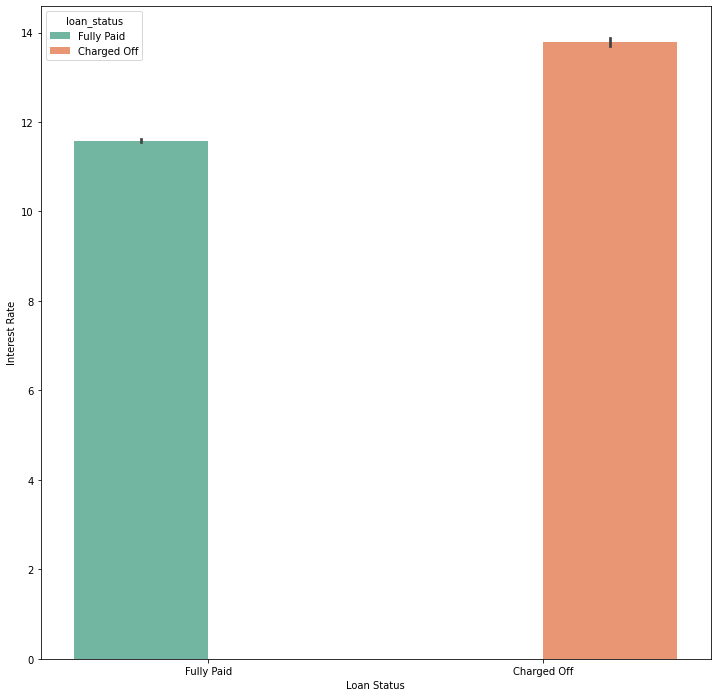

In [109]:
plt.figure(figsize=(12,12))
sns.barplot(data =loans_dataset, y='int_rate', x='loan_status', hue ='loan_status',palette="Set2")
plt.xlabel('Loan Status')
plt.ylabel('Interest Rate')
plt.show()

### This gives us an indication that for charged off loans, the interest rates were high